# Figure 5: Genetic Validation

## Purpose
Validate biological meaningfulness through genetic associations and demonstrate genetic architecture of signatures.

## Panels Required:
- **Panel A:** PRS differences between disease subtypes
- **Panel B:** Manhattan plot of signature-specific genetic associations
- **Panel C:** Signature-modifying variants (genetic × signature interaction)
- **Panel D:** Genetic correlation network of signatures

## Key Message:
Demonstrate that signatures have heritable biological architecture


In [ ]:
# Setup
import sys
import os
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300

print("Setup complete")


In [1]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/main_paper_figures/generate_prs_signature_plots.py --batch_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/censor_e_batchrun_vectorized/' --output_dir='/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/prs_signatures_corrected_E_PCS_SEX' --n_top 30

Output directory: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/prs_signatures_corrected_E_PCS_SEX
Loaded 36 PRS names from: /Users/sarahurbut/aladynoulli2/prs_names.csv

Loaded 36 PRS names
  First few: ['AAM', 'AMD', 'AD', 'AST', 'AF']

METHOD: Loading gamma from BATCH DIRECTORY (will average across batches)
Directory: /Users/sarahurbut/Library/CloudStorage/Dropbox/censor_e_batchrun_vectorized/
Pattern: enrollment_model_W0.0001_batch_*_*.pt
Found 40 batch checkpoints. Loading gamma...
  Loaded gamma from enrollment_model_W0.0001_batch_0_10000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_100000_110000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_10000_20000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_110000_120000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.0001_batch_120000_130000.pt (shape: (47, 21))
  Loaded gamma from enrollment_model_W0.000

Loading lead variants from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/all_loci_annotated.tsv...
Loaded 151 lead variants across 16 signatures
Marked 23 variants as '23 Unique Sig 5' loci (exact matching)
Novelty information available: 151 novel loci

Loading mask3 (LoF variants only) results from /Users/sarahurbut/Desktop/SIG/gene_based_analysis/canonical...
Loaded 59 significant associations from mask3
Best results per gene-signature: 19 associations
Unique genes: 18

✓ Saved figure to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/fig4/genetic_validation_multipanel.pdf


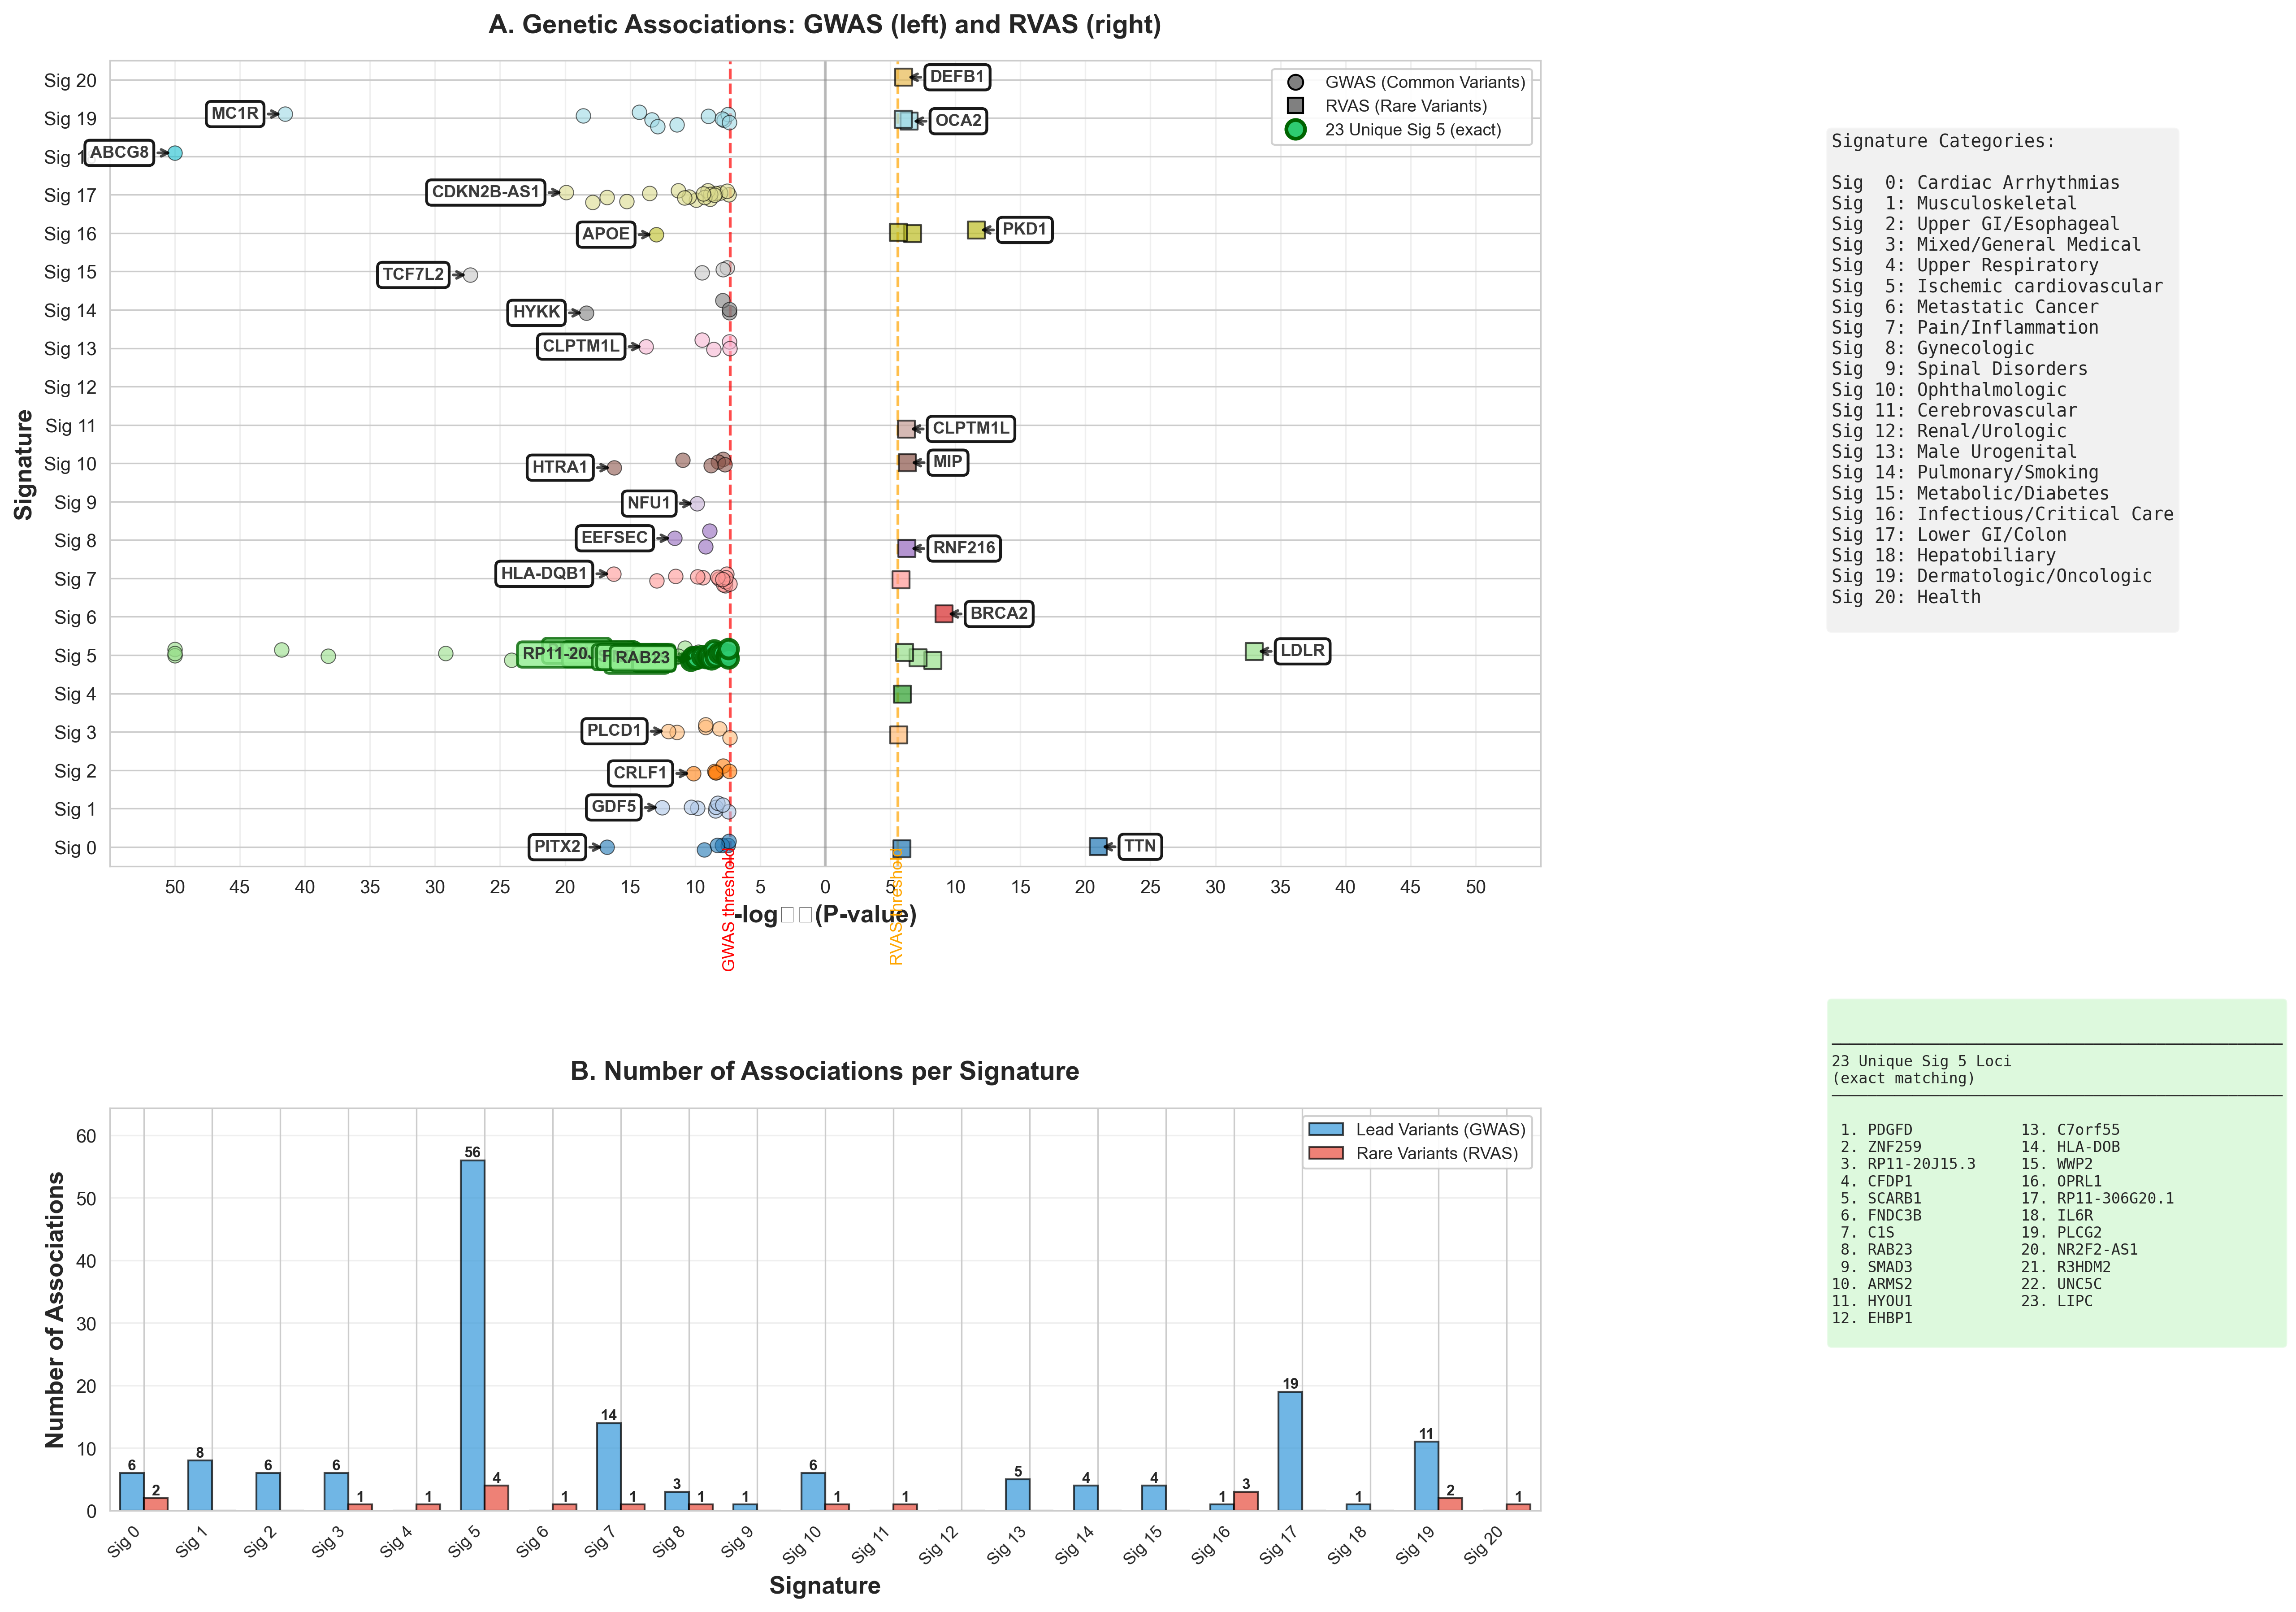


GENETIC ASSOCIATION SUMMARY
Lead Variants (GWAS):
  Total: 151
  Signatures with associations: 16

Rare Variants (RVAS, mask3):
  Total significant genes: 19
  Unique genes: 18
  Signatures with associations: 12

23 Unique Sig 5 Loci (exact matching): 23


In [6]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_figs/rap/visualize_genetic_loci.py

In [5]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/reviewer_responses/notebooks/R1/check_loci_uniqueness.py

ANALYSIS OF all_loci_annotated.tsv

Total rows (variants): 151
Total unique signatures: 16

Unique locus_id values: 121
Rows per unique locus_id:
  Mean: 1.25
  Median: 1
  Max: 8
  Loci with >1 variant: 19

Examples of loci with multiple variants:

  Locus ID 43 (8 variants):
    SIG13  NOTCH4          LOG10P=  9.48 rs2071278
    SIG15  BTNL2           LOG10P=  9.48 rs3806155
    SIG17  HLA-F           LOG10P=  9.26 rs3094560

  Locus ID 56 (4 variants):
    SIG10  CDKN2B-AS1      LOG10P=  7.73 rs7866783
    SIG17  CDKN2B-AS1      LOG10P= 19.93 rs4977575
    SIG19  CDKN2B-AS1      LOG10P=  7.37 rs7027950

  Locus ID 115 (3 variants):
    SIG19  PIGU            LOG10P= 18.60 rs910873
    SIG1   GDF5            LOG10P= 12.53 rs143384
    SIG5   GGT7            LOG10P=  7.74 rs6119534

  Locus ID 85 (3 variants):
    SIG17  ATXN2           LOG10P=  8.84 rs35350651
    SIG5   ATXN2           LOG10P= 11.85 rs10774625
    SIG7   SH2B3           LOG10P= 12.95 rs3184504

  Locus ID 38 (3 vari

Loading lead loci from: /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/all_loci_annotated.tsv
[INFO] RVAS file not found; RVAS panels will be skipped.
[INFO] GAMMA files not found; GAMMA panel will be skipped.
Found 56 lead loci for signature 5.

✓ Saved multi-panel figure to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/paper_gigs/fig4/genetic_validation_signature5_multipanel.pdf


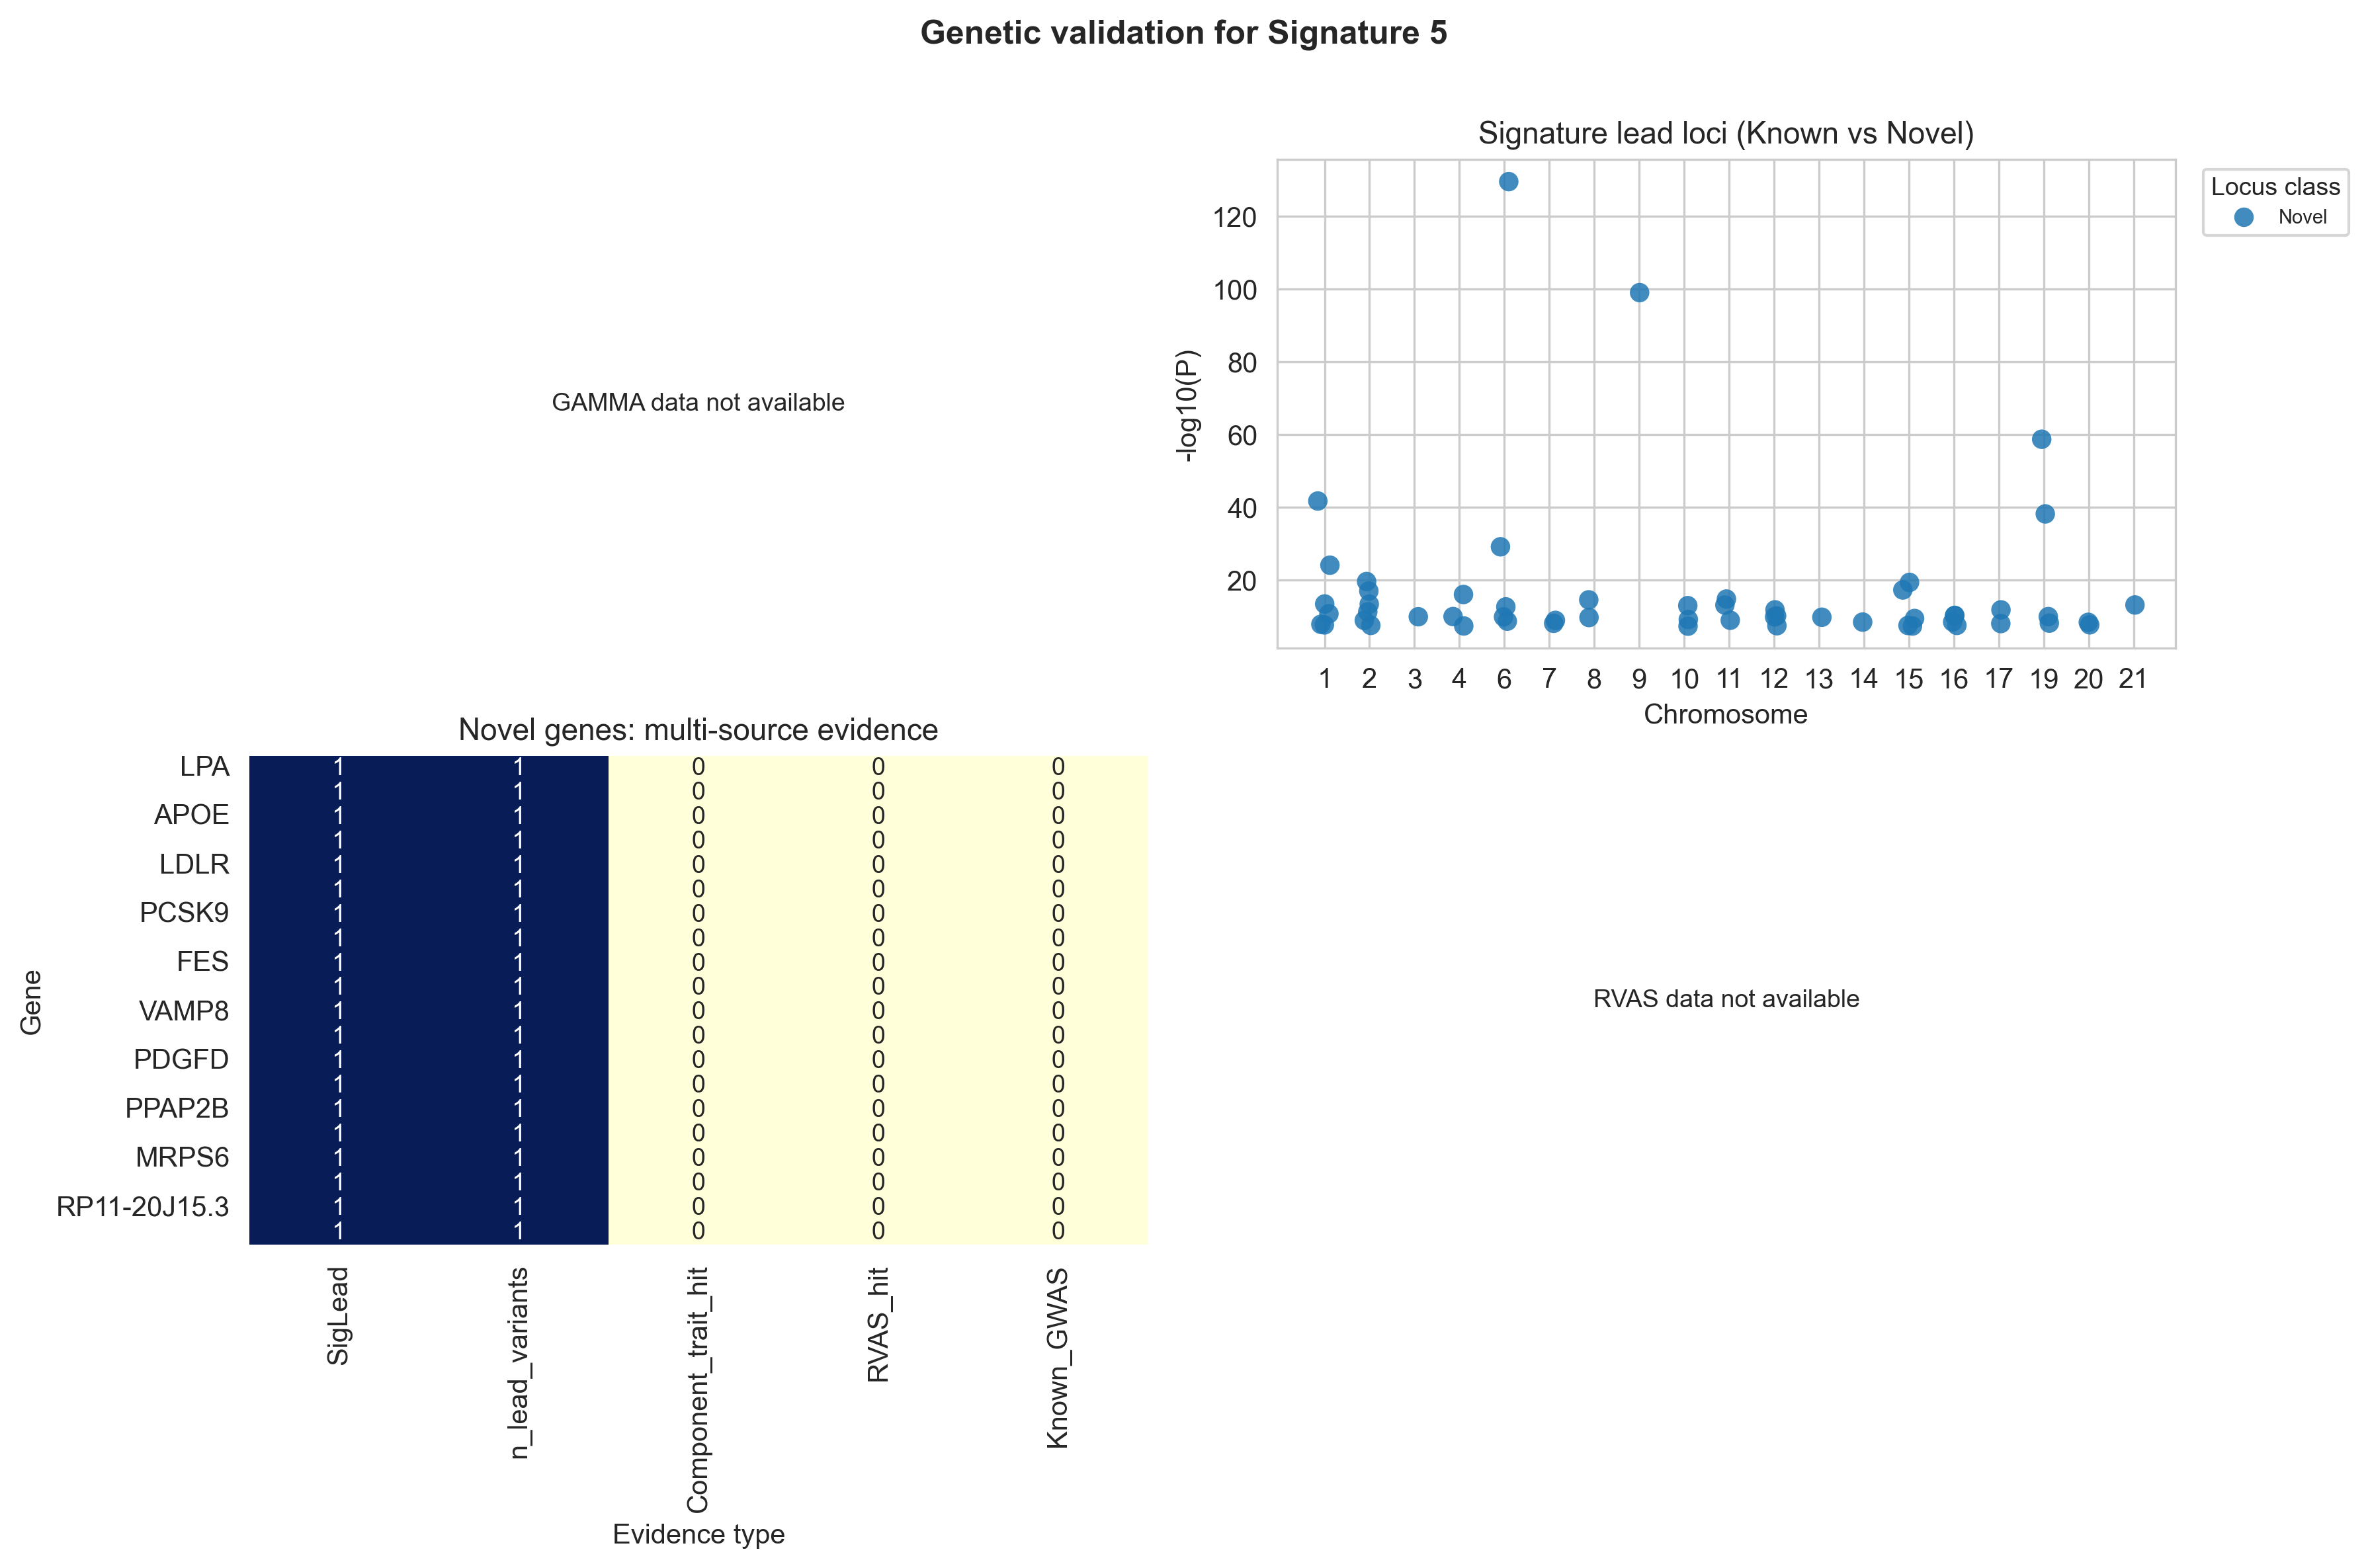

In [19]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/main_paper_figures/generate_genetic_validation_multipanel.py

In [46]:
"""
Compare loci from individual SIG files with all_loci_annotated.tsv
to verify they match and identify unique loci.
"""

import pandas as pd
import numpy as np
from pathlib import Path
from collections import defaultdict

# Path to SIG files directory (user mentioned it's in Desktop)
sig_files_dir = Path("/Users/sarahurbut/Desktop/leadforpaper")

# Load all_loci_annotated.tsv
loci_file = Path("/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/all_loci_annotated.tsv")
print(f"Loading all_loci_annotated.tsv from {loci_file}...")
all_loci_df = pd.read_csv(loci_file, sep='\t')
all_loci_df['SIG_NUM'] = all_loci_df['SIG'].str.replace('SIG', '').astype(int)

# Create unique identifier: CHR:POS:EA:OA (UID) or CHR:POS if UID not available
if 'UID' in all_loci_df.columns:
    all_loci_df['unique_id'] = all_loci_df['UID']
else:
    # Try different column name variations
    chr_col = None
    for col in all_loci_df.columns:
        if col.upper().replace('#', '').replace('_', '').strip() == 'CHR' or col == '#CHR':
            chr_col = col
            break
    
    if chr_col:
        all_loci_df['unique_id'] = all_loci_df[chr_col].astype(str) + ':' + all_loci_df['POS'].astype(str)
    else:
        print("Warning: Could not find CHR column in all_loci_annotated.tsv")
        print(f"Available columns: {all_loci_df.columns.tolist()}")

print(f"Loaded {len(all_loci_df)} loci from all_loci_annotated.tsv")
print(f"Signatures: {sorted(all_loci_df['SIG_NUM'].unique())}")

# Check if directory exists
if not sig_files_dir.exists():
    print(f"⚠️  Directory does not exist: {sig_files_dir}")
else:
    print(f"✓ Found directory: {sig_files_dir}")
    print(f"Files in directory:")
    for item in sorted(sig_files_dir.iterdir()):
        if item.is_file():
            size = item.stat().st_size
            print(f"  {item.name} ({size} bytes)")

# Load individual SIG files
sig_files_data = {}
sig_file_paths = {}

for sig_num in range(21):
    # Try different file naming patterns
    patterns = [
        f"SIG{sig_num}_AUC_ukb_eur*.lead.sumstats.txt",
        f"*SIG{sig_num}_AUC_ukb_eur*.lead.sumstats.txt",
        f"*SIG{sig_num}*.txt"
    ]
    
    sig_df = None
    file_path = None
    
    for pattern in patterns:
        matches = list(sig_files_dir.glob(pattern))
        if matches:
            file_path = matches[0]
            break
    
    if file_path and file_path.exists():
        # Check if file is empty
        if file_path.stat().st_size == 0:
            print(f"  ⚠ SIG{sig_num}: File is empty - {file_path.name}")
            continue
            
        try:
            # Read the file - header starts with #CHR, so don't use comment='#'
            # Read normally and pandas will handle the # in the column name
            sig_df = pd.read_csv(file_path, sep='\t')
            
            if sig_df is None or len(sig_df) == 0:
                print(f"  ⚠ SIG{sig_num}: No data rows - {file_path.name}")
                continue
            
            # Print column names for debugging (first file only)
            if sig_num == 0:
                print(f"\n  Column names in SIG files:")
                print(f"    {list(sig_df.columns)}")
            
            # Create unique identifier - use UID if available, otherwise CHR:POS
            if 'UID' in sig_df.columns:
                sig_df['unique_id'] = sig_df['UID']
            else:
                # Try to find CHR column (might be #CHR)
                chr_col = None
                for col in sig_df.columns:
                    if col == '#CHR' or col.upper().replace('#', '').strip() == 'CHR':
                        chr_col = col
                        break
                
                if chr_col and 'POS' in sig_df.columns:
                    sig_df['unique_id'] = sig_df[chr_col].astype(str) + ':' + sig_df['POS'].astype(str)
                else:
                    print(f"  ✗ SIG{sig_num}: Could not find CHR/POS columns")
                    print(f"    Available columns: {list(sig_df.columns)}")
                    continue
            
            sig_df['SIG_NUM'] = sig_num
            sig_files_data[sig_num] = sig_df
            sig_file_paths[sig_num] = file_path
            print(f"  ✓ SIG{sig_num}: {len(sig_df)} loci from {file_path.name}")
            
        except Exception as e:
            print(f"  ✗ SIG{sig_num}: Error processing file - {e}")
            import traceback
            traceback.print_exc()

print(f"\nLoaded {len(sig_files_data)} signature files")

if len(sig_files_data) == 0:
    print("⚠️  No signature files were successfully loaded. Please check:")
    print("  1. File paths and naming conventions")
    print("  2. File formats (should be tab-separated)")
    print("  3. File contents (some may be empty)")
    exit(1)

# Compare loci
comparison_results = []

for sig_num in range(21):
    if sig_num not in sig_files_data:
        continue
    
    sig_df = sig_files_data[sig_num]
    all_loci_sig = all_loci_df[all_loci_df['SIG_NUM'] == sig_num]
    
    # Get unique IDs
    sig_unique_ids = set(sig_df['unique_id'].values)
    all_loci_unique_ids = set(all_loci_sig['unique_id'].values)
    
    # Find matches and differences
    in_both = sig_unique_ids & all_loci_unique_ids
    only_in_sig_file = sig_unique_ids - all_loci_unique_ids
    only_in_all_loci = all_loci_unique_ids - sig_unique_ids
    
    comparison_results.append({
        'Signature': sig_num,
        'In_SIG_file': len(sig_unique_ids),
        'In_all_loci': len(all_loci_unique_ids),
        'In_both': len(in_both),
        'Only_in_SIG_file': len(only_in_sig_file),
        'Only_in_all_loci': len(only_in_all_loci),
        'Match_rate': len(in_both) / max(len(sig_unique_ids), 1) * 100
    })
    
    if len(only_in_sig_file) > 0 or len(only_in_all_loci) > 0:
        print(f"\nSIG{sig_num} discrepancies:")
        if len(only_in_sig_file) > 0:
            print(f"  Only in SIG file ({len(only_in_sig_file)}):")
            for uid in list(only_in_sig_file)[:5]:  # Show first 5
                row = sig_df[sig_df['unique_id'] == uid].iloc[0]
                rsid = row.get('rsid', 'N/A')
                print(f"    {uid} (rsid: {rsid})")
        if len(only_in_all_loci) > 0:
            print(f"  Only in all_loci ({len(only_in_all_loci)}):")
            for uid in list(only_in_all_loci)[:5]:  # Show first 5
                row = all_loci_sig[all_loci_sig['unique_id'] == uid].iloc[0]
                rsid = row.get('rsid', 'N/A')
                print(f"    {uid} (rsid: {rsid})")

# Create summary table
comparison_df = pd.DataFrame(comparison_results)
print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))

# Calculate total unique loci across all signatures
all_sig_unique_ids = set()
for sig_df in sig_files_data.values():
    all_sig_unique_ids.update(sig_df['unique_id'].values)

all_loci_unique_ids = set(all_loci_df['unique_id'].values)

print(f"\n" + "="*80)
print("OVERALL SUMMARY")
print("="*80)
print(f"Total unique loci in SIG files: {len(all_sig_unique_ids)}")
print(f"Total unique loci in all_loci_annotated.tsv: {len(all_loci_unique_ids)}")
print(f"Loci in both: {len(all_sig_unique_ids & all_loci_unique_ids)}")
print(f"Only in SIG files: {len(all_sig_unique_ids - all_loci_unique_ids)}")
print(f"Only in all_loci: {len(all_loci_unique_ids - all_sig_unique_ids)}")

# Save comparison table
output_file = Path("/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/loci_comparison_table.csv")
output_file.parent.mkdir(parents=True, exist_ok=True)
comparison_df.to_csv(output_file, index=False)
print(f"\n✓ Saved comparison table to: {output_file}")

# Create detailed table of unique loci per signature
unique_loci_table = []
for sig_num in range(21):
    if sig_num not in sig_files_data:
        continue
    
    sig_df = sig_files_data[sig_num]
    for _, row in sig_df.iterrows():
        # Get column values with fallbacks
        chr_col = '#CHR' if '#CHR' in sig_df.columns else 'CHR'
        chr_val = row.get(chr_col, 'N/A')
        pos_val = row.get('POS', 'N/A')
        uid_val = row.get('UID', 'N/A')
        rsid_val = row.get('rsid', 'N/A')
        log10p_val = row.get('LOG10P', 'N/A')
        gene_val = row.get('nearestgene', 'N/A') if 'nearestgene' in row else 'N/A'
        
        unique_loci_table.append({
            'Signature': sig_num,
            'CHR': chr_val,
            'POS': pos_val,
            'UID': uid_val,
            'rsid': rsid_val,
            'LOG10P': log10p_val,
            'nearestgene': gene_val
        })

unique_loci_df = pd.DataFrame(unique_loci_table)
unique_loci_output = output_file.parent / "unique_loci_per_signature.csv"
unique_loci_df.to_csv(unique_loci_output, index=False)
print(f"✓ Saved unique loci table to: {unique_loci_output}")
print(f"  Total loci: {len(unique_loci_df)}")

Loading all_loci_annotated.tsv from /Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/all_loci_annotated.tsv...
Loaded 151 loci from all_loci_annotated.tsv
Signatures: [0, 1, 2, 3, 5, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19]
✓ Found directory: /Users/sarahurbut/Desktop/leadforpaper
Files in directory:
  SIG0_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (1044 bytes)
  SIG10_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (1064 bytes)
  SIG11_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (151 bytes)
  SIG12_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (151 bytes)
  SIG13_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (898 bytes)
  SIG14_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (746 bytes)
  SIG15_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (750 bytes)
  SIG16_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (294 bytes)
  SIG17_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (2998 bytes)
  SIG18_AUC_ukb_eur_regenie_af1.sig.lead.sumstats.txt (296 bytes)
  SIG19_AUC_ukb_eur_regenie_a

In [47]:
"""
Convert unique_loci_per_signature.csv to VCF format for Ensembl VEP upload
"""

import pandas as pd
from pathlib import Path

# Load your loci table
loci_df = pd.read_csv("/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/unique_loci_per_signature.csv")

# Create VCF file
vcf_lines = []
vcf_lines.append("##fileformat=VCFv4.2")
vcf_lines.append("##source=unique_loci_per_signature")
vcf_lines.append("#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO")

# For each locus, create a VCF line
# Note: We'll need to handle cases where we don't have REF/ALT
for _, row in loci_df.iterrows():
    chrom = f"chr{int(row['CHR'])}"
    pos = int(row['POS'])
    rsid = row.get('rsid', '.')
    
    # Try to extract REF/ALT from UID if available
    # UID format is like "1:154400320:A:G"
    ref = '.'
    alt = '.'
    if 'UID' in row and pd.notna(row['UID']):
        uid_parts = str(row['UID']).split(':')
        if len(uid_parts) >= 4:
            ref = uid_parts[2]
            alt = uid_parts[3]
    
    # If still missing, use placeholder
    if ref == '.' or alt == '.':
        ref = 'N'
        alt = 'N'
    
    # Create VCF line
    vcf_line = f"{chrom}\t{pos}\t{rsid}\t{ref}\t{alt}\t.\t.\t."
    vcf_lines.append(vcf_line)

# Write VCF file
output_vcf = Path("/Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/unique_loci_for_vep.vcf")
with open(output_vcf, 'w') as f:
    f.write('\n'.join(vcf_lines))

print(f"✓ Created VCF file: {output_vcf}")
print(f"  Total variants: {len(loci_df)}")
print(f"\nYou can now upload this file to:")
print(f"  https://www.ensembl.org/Tools/VEP")

✓ Created VCF file: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/unique_loci_for_vep.vcf
  Total variants: 151

You can now upload this file to:
  https://www.ensembl.org/Tools/VEP


In [7]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/annotate_loci.py

Loading loci from: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/unique_loci_per_signature.csv
Loaded 151 loci to annotate

Testing API connection with first variant...
Test variant: rs6843082
VEP by ID result: True
  Result keys: ['input', 'assembly_name', 'start', 'colocated_variants', 'id', 'allele_string', 'end', 'most_severe_consequence', 'transcript_consequences', 'strand', 'seq_region_name']

Starting annotation...

[1/151] rs6843082 at 4:111718067... → LINC01438 (rsID)
[2/151] rs74617384 at 6:160997118... → LPA (rsID)
[3/151] rs2509765 at 8:102490380... → GRHL2-DT (rsID)
[4/151] rs10125609 at 9:97590631... → AOPEP (rsID)
[5/151] rs77410568 at 20:42954982... → N/A (rsID)
[6/151] rs12627426 at 21:30519457... → MAP3K7CL (rsID)
[7/151] rs58786532 at 2:33406050... → LTBP1 (rsID)
[8/151] rs2902345 at 2:70716599... → TGFA (rsID)
[9/151] rs34592089 at 4:102926923... → BANK1 (rsID)
[10/151] rs3116812 at 6:29660940... → N/A (rsID)
[11/151] rs1469598 at 9:1

In [18]:
%run /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/create_annotation_comparison.py

Loading files...
Loaded 151 loci from Ensembl annotations
Loaded 151 loci from original annotations

ANNOTATION COMPARISON FILE CREATED
✓ Saved to: /Users/sarahurbut/aladynoulli2/pyScripts/dec_6_revision/new_notebooks/results/variant_annotation_comparison.csv

Total variants: 151

Annotation comparison summary:
  Match: 99 (65.6%)
  Different: 26 (17.2%)
  Ensembl_missing: 26 (17.2%)

Known vs Novel (from original file):

Variants with Ensembl annotation: 151
Variants with original annotation: 151

Done! Check the output file for detailed comparison.
